In [8]:
using Catalyst, DifferentialEquations, Plots, Latexify

In [9]:
kepler = @reaction_network begin
    δ, m --> ∅
    α0*O0, ∅ --> m
    α1*O1, ∅ --> m
    a, M + M --> D
    (Θ*a), D --> M + M
    K, O0 + D --> O1
    (β*K), O1 --> O0 + D
end a Θ K β δ α0  α1

Model ##ReactionSystem#257 with 7 equations
States (5):
  m(t)
  M(t)
  D(t)
  O0(t)
  O1(t)
Parameters (7):
  a
  Θ
  K
  β
  δ
  α0
⋮

In [10]:
δ = 1
Θ = 10000
β = 10
α1 = 1000
α0 = 50
K = 0.15

0.15

In [11]:
odesys = convert(ODESystem, kepler)

Model ##ReactionSystem#257 with 5 equations
States (5):
  m(t)
  M(t)
  D(t)
  O0(t)
  O1(t)
Parameters (7):
  a
  Θ
  K
  β
  δ
  α0
⋮

In [12]:
speciesmap(kepler)

Dict{Term{Real, Base.ImmutableDict{DataType, Any}}, Int64} with 5 entries:
  m(t)  => 1
  O1(t) => 5
  M(t)  => 2
  D(t)  => 3
  O0(t) => 4

In [13]:
paramsmap(kepler)

Dict{Sym{Real, Base.ImmutableDict{DataType, Any}}, Int64} with 7 entries:
  α0 => 6
  K  => 3
  Θ  => 2
  δ  => 5
  α1 => 7
  a  => 1
  β  => 4

In [14]:
p = (0.05, 10000, 0.15, 10, 1, 50, 1000)

u₀ = [20.,0.,0.,1.,0.2]

tspan = (0., 10000.)

oprob = ODEProblem(kepler, u₀, tspan, p)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 10000.0)
u0: 5-element Vector{Float64}:
 20.0
  0.0
  0.0
  1.0
  0.2

┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase C:\Users\Hp\.julia\packages\SciMLBase\h4Gxc\src\integrator_interface.jl:331


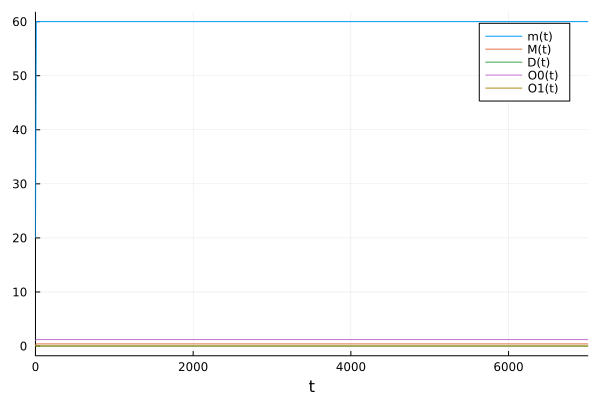

In [15]:
sol = solve(oprob, Tsit5(), saveat=10.)
plot(sol)

In [16]:
dprob = DiscreteProblem(kepler, u₀ , tspan , p)
jprob = JumpProblem(kepler, dprob, Direct(), save_positions = (false,false))

sol2 = solve(jprob , SSAStepper(), saveat=10.)
plot(sol2)

In [17]:
rn = @reaction_network begin
    1/(1+x2^2/(b+x1^2)), ∅ --> x1
    1/(1+x1^2/(b+x2^2)), ∅ --> x2
    1, x1 --> ∅
    1, x2 --> ∅
end b

Model ##ReactionSystem#262 with 4 equations
States (2):
  x1(t)
  x2(t)
Parameters (1):
  b

In [18]:
b = 0.4

0.4

In [19]:
speciesmap(rn)

Dict{Term{Real, Base.ImmutableDict{DataType, Any}}, Int64} with 2 entries:
  x1(t) => 1
  x2(t) => 2

In [20]:
paramsmap(rn)

Dict{Sym{Real, Base.ImmutableDict{DataType, Any}}, Int64} with 1 entry:
  b => 1

In [21]:
using BifurcationKit, Plots, LinearAlgebra, Setfield

In [22]:
p1 = (0.4)


0.4

In [23]:
odefun = ODEFunction(convert(ODESystem,rn),jac=true)
F = (u,p) -> odefun(u1,p1,0)      
J = (u,p) -> odefun.jac(u1,p1,0)

#3 (generic function with 1 method)

In [24]:
optnewton = NewtonPar(tol = 1e-11, verbose = true)

NewtonPar{Float64, DefaultLS, DefaultEig{typeof(real)}}
  tol: Float64 1.0e-11
  maxIter: Int64 50
  α: Float64 1.0
  αmin: Float64 0.001
  verbose: Bool true
  linesearch: Bool false
  linsolver: DefaultLS
  eigsolver: DefaultEig{typeof(real)}


In [25]:
optcont = ContinuationPar(dsmin = 0.01, dsmax = 0.15, ds= 0.01, pMax = 4.1, newtonOptions = NewtonPar(tol = 1e-9))

ContinuationPar{Float64, DefaultLS, DefaultEig{typeof(real)}}
  dsmin: Float64 0.01
  dsmax: Float64 0.15
  ds: Float64 0.01
  theta: Float64 0.5
  doArcLengthScaling: Bool false
  gGoal: Float64 0.5
  gMax: Float64 0.8
  thetaMin: Float64 0.001
  a: Float64 0.5
  tangentFactorExponent: Float64 1.5
  pMin: Float64 -1.0
  pMax: Float64 4.1
  maxSteps: Int64 100
  finDiffEps: Float64 1.0e-9
  newtonOptions: NewtonPar{Float64, DefaultLS, DefaultEig{typeof(real)}}
  η: Float64 150.0
  saveToFile: Bool false
  saveSolEveryStep: Int64 0
  nev: Int64 3
  saveEigEveryStep: Int64 1
  saveEigenvectors: Bool true
  plotEveryStep: Int64 10
  precisionStability: Float64 1.0e-10
  detectFold: Bool true
  detectBifurcation: Int64 0
  dsminBisection: Float64 1.0e-16
  nInversion: Int64 2
  maxBisectionSteps: Int64 15
  tolBisectionEigenvalue: Float64 1.0e-16
  detectEvent: Int64 0
  tolParamBisectionEvent: Float64 1.0e-16
  detectLoop: Bool false


LoadError: LoadError: MethodError: no method matching var"@lens"(::LineNumberNode, ::Module)
[0mClosest candidates are:
[0m  var"@lens"(::LineNumberNode, ::Module, [91m::Any[39m) at C:\Users\Hp\.julia\packages\Setfield\NshXm\src\sugar.jl:237
in expression starting at In[26]:1

In [27]:
#p1 = (0.05, 0.1, 20. )

#u1 = [20.]

#tspan1 = (0., 10000.)

#oprob1 = ODEProblem(rn, u1, tspan1, p1)